<a href="https://colab.research.google.com/github/Kira1108/PromptEngineering/blob/main/Prompt_Langchain_SampleSelector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

只要你format能出东西，你就赢了

In [1]:
from IPython.display import clear_output
!pip install openai langchain sentencepiece tiktoken
clear_output()

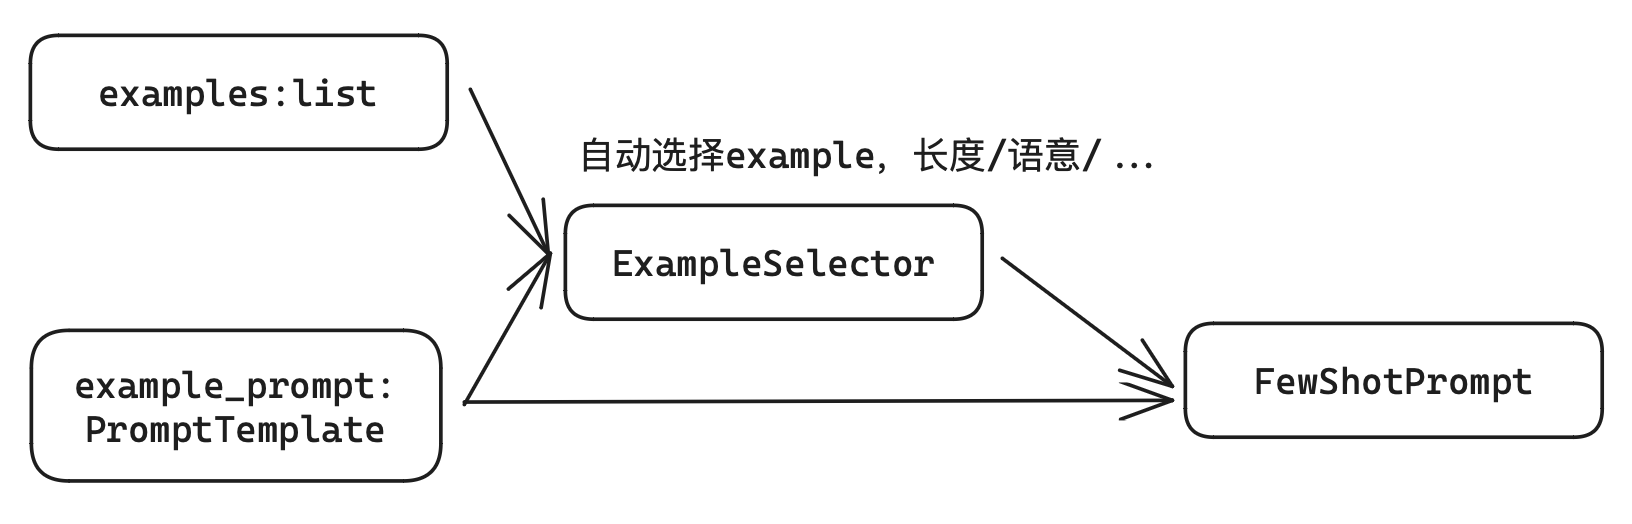

In [6]:
from langchain.prompts import PromptTemplate, FewShotPromptTemplate
from langchain.prompts.example_selector import LengthBasedExampleSelector

In [10]:
# These are a lot of examples of a pretend task of creating antonyms.
examples = [
    {"word": "happy", "antonym": "sad"},
    {"word": "tall", "antonym": "short"},
    {"word": "energetic", "antonym": "lethargic"},
    {"word": "sunny", "antonym": "gloomy"},
    {"word": "windy", "antonym": "calm"},
]

example_prompt = PromptTemplate.from_template("word: {word}\nantonym: {antonym}")

# We'll use the `LengthBasedExampleSelector` to select the examples.
example_selector = LengthBasedExampleSelector(
    # These are the examples is has available to choose from.
    examples=examples, 
    # This is the PromptTemplate being used to format the examples.
    example_prompt=example_prompt, 
    # This is the maximum length that the formatted examples should be.
    # Length is measured by the get_text_length function below.
    max_length=25,
)

# We can now use the `example_selector` to create a `FewShotPromptTemplate`.
dynamic_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix="Give the antonym of every input",
    suffix="Word: {input}\nAntonym:",
    input_variables=["input"],
    example_separator="\n\n",
)

# We can now generate a prompt using the `format` method.
print(dynamic_prompt.format(input="big"))

Give the antonym of every input

word: happy
antonym: sad

word: tall
antonym: short

word: energetic
antonym: lethargic

word: sunny
antonym: gloomy

word: windy
antonym: calm

Word: big
Antonym:
